<a href="https://colab.research.google.com/github/Vignesh-kanna/ml_with_flask/blob/main/Newspaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Get the filename of the upload
uploaded = files.upload()
aaa = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
df = pd.read_csv(aaa)


Saving NewspaperData.csv to NewspaperData.csv


In [ ]:
df.head()
df_new = df[['daily','sunday']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   daily   34 non-null     float64
 1   sunday  34 non-null     float64
dtypes: float64(2)
memory usage: 676.0 bytes


In [ ]:
df.shape

(34, 3)

In [ ]:
df_new.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<ipython-input-4-60e927544913>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['daily'])


<Axes: xlabel='daily', ylabel='Density'>

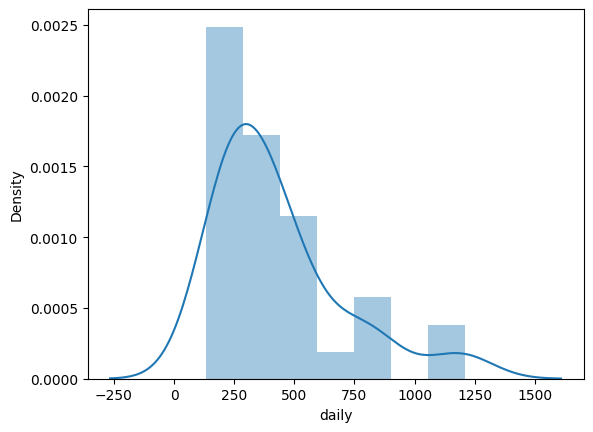

In [ ]:
import seaborn as sns
sns.distplot(df['daily'])

<ipython-input-5-00a7cbb247ee>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

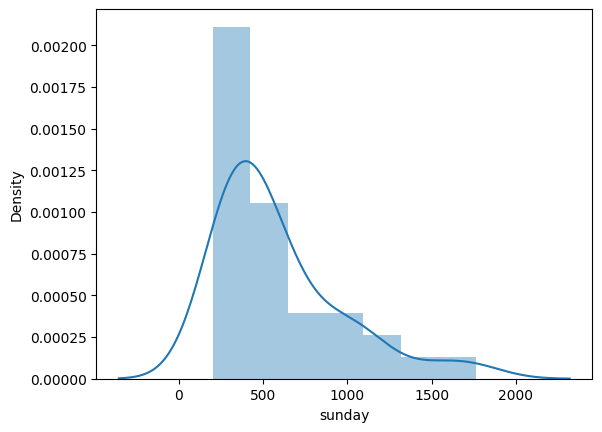

In [ ]:
import seaborn as sns
sns.distplot(df['sunday'])

Fitting a Linear Regression Model

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('sunday ~ daily', data=df).fit()

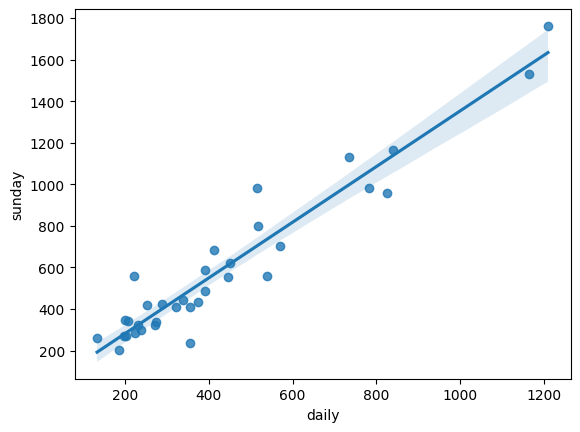

In [ ]:
sns.regplot(x='daily', y='sunday', data=df);

In [ ]:
print(model.tvalues, '\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

Predict for new data point

In [ ]:
newdata=pd.Series([200,300])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [ ]:
model.predict(data_pred)

,0
0,281.778581
1,415.750057


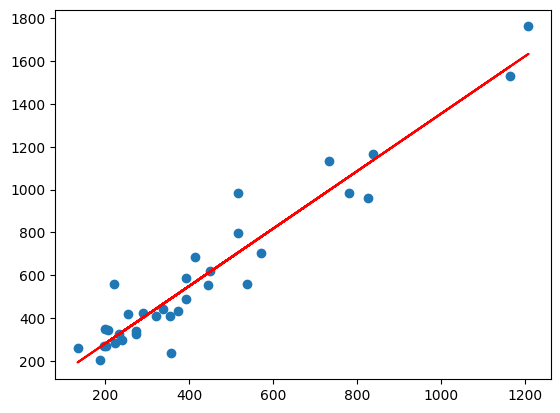

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['daily'], df['sunday'])
plt.plot(df['daily'], model.predict(), color='red')
plt.show()